#Housing Prices Prediction using Decision Tree and Linear Regression
###Problem Description: 
Ask a home buyer to describe their dream house, and they probably won't begin with the height of the basement ceiling or the proximity to an east-west railroad. But this playground competition's dataset proves that much more influences price negotiations than the number of bedrooms or a white-picket fence.

With 79 explanatory variables describing (almost) every aspect of residential homes in Ames, Iowa, this competition challenges you to predict the final price of each home.

###Import Libraries:

In [109]:
import numpy as np
import pandas as pd
import matplotlib
%matplotlib inline 
#Enable Iniline Plotting
import matplotlib.pyplot as plt
from scipy.stats import skew

###Import Data:

In [110]:
traindata=pd.read_csv('../data/train.csv')
traindata=traindata.loc[:,'MSSubClass':'SalePrice']
traindata.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


Normalise the skewed data by using log transform. When data is skewed mean normalization is not helpful and log transformation helps to get a data with less skewness. In this case we will calculate log(1+feature)

In [111]:
#log transform the target:
traindata["SalePrice"] = np.log1p(traindata["SalePrice"])

#log transform skewed numeric features:
numeric_feats = traindata.dtypes[traindata.dtypes != "object"].index

skewed_feats = traindata[numeric_feats].apply(lambda x: skew(x.dropna())) #compute skewness
skewed_feats = skewed_feats[skewed_feats > 0.75]
skewed_feats = skewed_feats.index

traindata[skewed_feats] = np.log1p(traindata[skewed_feats])


Now we convert categorical features using bit pair encoding. And then generate the X and y datasets.

In [112]:
traindata=pd.get_dummies(traindata)

#Remove NaN with mean of the values
traindata=traindata.fillna(traindata.mean())

#Generate  X and y datasets
y=traindata["SalePrice"]
X=traindata.iloc[:,:(traindata.shape[1]-1)]
X.head()



,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_Abnorml,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal
0,4.110874,4.189655,9.042040,7,5,2003,2003,5.283204,6.561031,0.0,...,0,0,0,0,1,0,0,0,0,1
1,3.044522,4.394449,9.169623,6,8,1976,1976,0.000000,6.886532,0.0,...,0,0,0,0,1,0,0,0,0,1
2,4.110874,4.234107,9.328212,7,5,2001,2002,5.093750,6.188264,0.0,...,0,0,0,0,1,0,0,0,0,1
3,4.262680,4.110874,9.164401,7,5,1915,1970,0.000000,5.379897,0.0,...,0,0,0,0,1,1,0,0,0,0
4,4.110874,4.442651,9.565284,8,5,2000,2000,5.860786,6.486161,0.0,...,0,0,0,0,1,0,0,0,0,1


###Training using CART Trees
First we will train the model using CART decision Trees.

In [113]:
from sklearn import tree
classifierCART=tree.DecisionTreeRegressor()
classifierCART=classifierCART.fit(X,y)

Plotting the error of the actual value (y is in mormalized form)

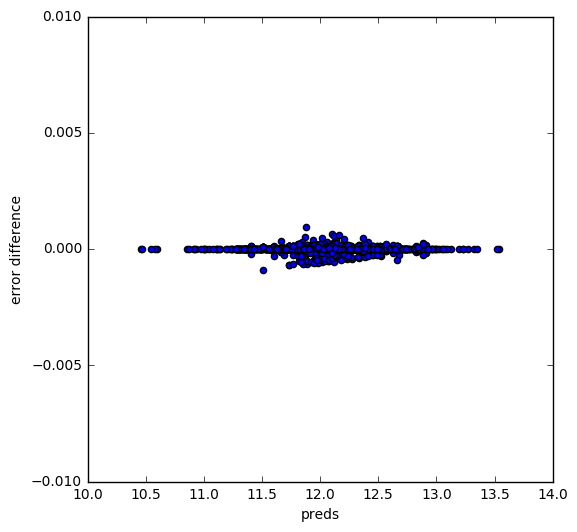

In [114]:
matplotlib.rcParams['figure.figsize'] = (6.0, 6.0)

preds = pd.DataFrame({"preds":classifierCART.predict(X), "true":y})
preds["error difference"] = preds["true"] - preds["preds"]
preds.plot(x = "preds", y = "error difference",kind = "scatter")

####Visualizing the Decision Tree

In [115]:
'''
import pydotplus 
dot_data = tree.export_graphviz(classifierCART, out_file=None, 
                         feature_names=list(X.columns.values),  
                         class_names='SalesPrice' , 
                         filled=True, rounded=True,  
                         special_characters=True)
graph = pydotplus.graph_from_dot_data(dot_data)  
graph.write_pdf("iris.pdf") 
'''

'\nimport pydotplus \ndot_data = tree.export_graphviz(classifierCART, out_file=None, \n                         feature_names=list(X.columns.values),  \n                         class_names=\'SalesPrice\' , \n                         filled=True, rounded=True,  \n                         special_characters=True)\ngraph = pydotplus.graph_from_dot_data(dot_data)  \ngraph.write_pdf("iris.pdf") \n'